# Experimentación ejercicio 1: Dinámica


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

%matplotlib inline

In [58]:
ds = pd.read_csv('./exp/outputs/output.csv')

ds[:3]

,n_works,instance,repetition,algorithm,ticks,time,cost,res_length
0,5,1,1,bottom,14,0.014,174,3
1,5,1,1,memo,13,0.013,174,3
2,5,1,2,bottom,11,0.011,174,3


In [59]:
ds_grouped = ds.groupby(['algorithm','n_works']).mean()[['time']]
    
ds_grouped[:3]

time
algorithm n_works          
bottom    5        0.010923
          25       0.048058
          45       0.104152

# Botton up vs. Memo

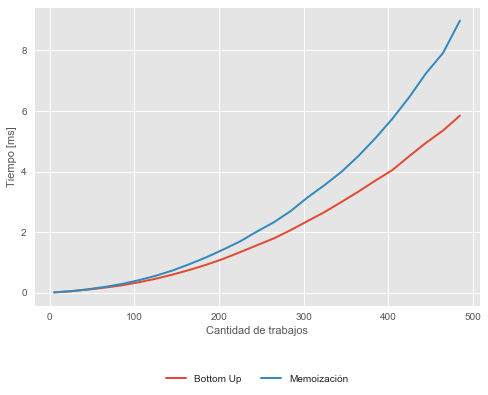

In [60]:
plt.style.use('ggplot')
plt.style.use('seaborn-notebook')

fig, ax = plt.subplots()

# ax.set_yscale('log')

ax.plot(ds_grouped.xs('bottom'), linewidth=2.0)
ax.plot(ds_grouped.xs('memo'), linewidth=2.0)

plt.grid(True)

legend = ax.legend([u'Bottom Up', u'Memoización'], loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=2)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_linewidth(0)

plt.rcParams.update({'font.size': 8})

plt.xlabel(u'Cantidad de trabajos')
plt.ylabel(u'Tiempo [ms]')

plt.savefig('exp/ej1_bottom_vs_memo.pdf', bbox_inches = 'tight')

# Complejidad

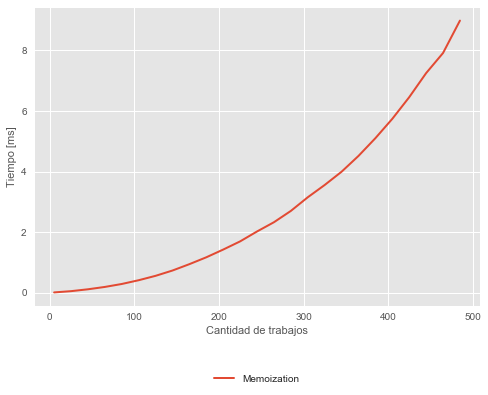

In [61]:
plt.style.use('ggplot')
plt.style.use('seaborn-notebook')

fig, ax = plt.subplots()

# ax.set_yscale('log')

ax.plot(ds_grouped.xs('memo'), linewidth=2.0)

plt.grid(True)

legend = ax.legend([u'Memoization'], loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_linewidth(0)

plt.rcParams.update({'font.size': 8})

plt.xlabel(u'Cantidad de trabajos')
plt.ylabel(u'Tiempo [ms]')

# plt.savefig('exp/ej1_complex.pdf', bbox_inches = 'tight')

## Coeficiente de Pearson

In [62]:
import numpy as np
import math


t = np.arange(5,500,20)
tnlogn = []
tn2logn = []

for i in range(0, len(t)):
    tnlogn.append(math.log(t[i], 2)*t[i])
    tn2logn.append(math.log(t[i], 2)*t[i]*t[i])
    
    
group = ds.groupby(['algorithm','n_works']).median().xs('memo').reset_index()
# group = ds.groupby(['algorithm','n_works']).median().xs('bottom').reset_index()
# print group

lin = np.corrcoef(group['ticks'], t)[0,1]
nlogn = np.corrcoef(group['ticks'], tnlogn)[0,1]
cuad = np.corrcoef(group['ticks'], t**2)[0,1]
n2logn = np.corrcoef(group['ticks'], tn2logn)[0,1]
cub = np.corrcoef(group['ticks'], t**3)[0,1]
cuart = np.corrcoef(group['ticks'], t**4)[0,1]



print(str(round(lin,6)) + " & " + str(round(nlogn,6)) + " & " + str(round(cuad,6)) + " & " + str(round(n2logn,6)) + " & " + str(round(cub,6)) + " & " + str(round(cuart,6)) )


0.949652 & 0.963788 & 0.996823 & 0.998504 & 0.995087 & 0.977116
